In [8]:
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
import random, shutil
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Conv2D, Flatten, Dense, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import load_model


def generator(dir, gen=image.ImageDataGenerator(rescale=1./255), shuffle=True,batch_size=1,target_size=(24,24),class_mode='categorical' ):

    return gen.flow_from_directory(dir,batch_size=batch_size,shuffle=shuffle,color_mode='grayscale',class_mode=class_mode,target_size=target_size)

BS= 32
TS=(24,24)
train_batch= generator('data/train',shuffle=True, batch_size=BS,target_size=TS)
valid_batch= generator('data/valid',shuffle=True, batch_size=BS,target_size=TS)
SPE= len(train_batch.classes)//BS
VS = len(valid_batch.classes)//BS
print(SPE,VS)


# img,labels= next(train_batch)
# print(img.shape)

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24,24,1)),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
#32 convolution filters used each of size 3x3
#again
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),

#64 convolution filters used each of size 3x3
#choose the best features via pooling
    
#randomly turn neurons on and off to improve convergence
    Dropout(0.25),
#flatten since too many dimensions, we only want a classification output
    Flatten(),
#fully connected to get all relevant data
    Dense(128, activation='relu'),
#one more dropout for convergence' sake :) 
    Dropout(0.5),
#output a softmax to squash the matrix into output probabilities
    #Dense(2, activation='softmax')
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



Found 433 images belonging to 4 classes.
Found 433 images belonging to 4 classes.
13 13


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 18, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [10]:
#model.fit_generator(train_batch, validation_data=valid_batch,epochs=15,steps_per_epoch=SPE ,validation_steps=VS)
hist = model.fit(train_batch, validation_data=valid_batch,epochs=15,steps_per_epoch=SPE ,validation_steps=VS)



Epoch 1/15
13/13 [==============================] - 2s 123ms/step - loss: 1.1891 - accuracy: 0.4713 - val_loss: 0.7389 - val_accuracy: 0.7163
Epoch 2/15
13/13 [==============================] - 1s 114ms/step - loss: 0.7519 - accuracy: 0.6758 - val_loss: 0.6828 - val_accuracy: 0.6923
Epoch 3/15
13/13 [==============================] - 2s 137ms/step - loss: 0.6648 - accuracy: 0.7057 - val_loss: 0.4418 - val_accuracy: 0.8630
Epoch 4/15
13/13 [==============================] - 2s 162ms/step - loss: 0.4614 - accuracy: 0.7905 - val_loss: 0.3525 - val_accuracy: 0.8582
Epoch 5/15
13/13 [==============================] - 2s 164ms/step - loss: 0.4072 - accuracy: 0.8245 - val_loss: 0.3031 - val_accuracy: 0.8702
Epoch 6/15
13/13 [==============================] - 2s 156ms/step - loss: 0.3715 - accuracy: 0.8454 - val_loss: 0.2506 - val_accuracy: 0.9207
Epoch 7/15
13/13 [==============================] - 2s 160ms/step - loss: 0.2999 - accuracy: 0.8753 - val_loss: 0.2154 - val_accuracy: 0.9231
Epoch 

## Plot Performance

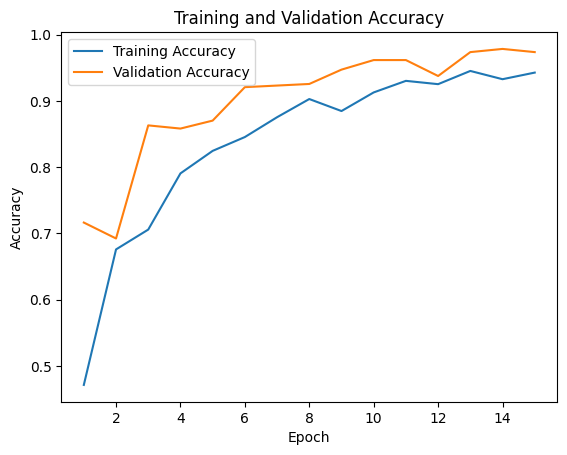

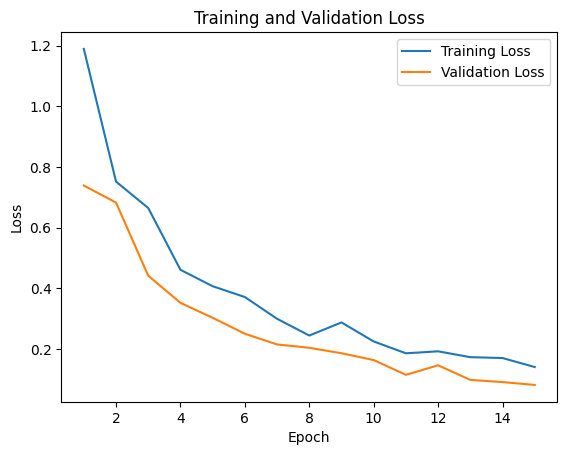

In [11]:
# Retrieve the training accuracy, loss, validation accuracy, and validation loss
accuracy = hist.history['accuracy']
loss = hist.history['loss']
val_accuracy = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

# Plotting the accuracy
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plotting the loss
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## Save the trained model

In [12]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [13]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [14]:
model.save('models/cnnCat2.h5', overwrite=True)

## Evaluate our trained model

In [15]:
# Load the trained model
model = load_model('models/cnnCat2.h5')

# Create a new generator for the test data
test_batch = generator('data/valid', shuffle=False, batch_size=1, target_size=TS)

# Get the total number of test samples
total_test_samples = len(test_batch.classes)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_batch, steps=total_test_samples)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Found 433 images belonging to 4 classes.
433/433 [==============================] - 1s 3ms/step - loss: 0.0824 - accuracy: 0.9723
Test Loss: 0.08237283676862717
Test Accuracy: 0.9722864031791687


## Plot a confusion matrix based on the predictions made by the model,

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

433/433 [==============================] - 1s 3ms/step


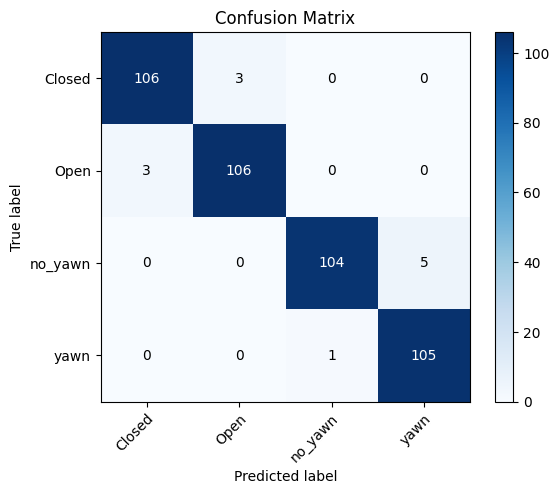

In [17]:
# Get the total number of test samples and number of classes
total_test_samples = len(test_batch.classes)
num_classes = len(test_batch.class_indices)

# Generate predictions for the test data
predictions = model.predict(test_batch, steps=total_test_samples)
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels for the test data
true_labels = test_batch.classes

# Compute the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Get class labels
class_labels = list(test_batch.class_indices.keys())

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(confusion_mat.shape[1]),
       yticks=np.arange(confusion_mat.shape[0]),
       xticklabels=class_labels,
       yticklabels=class_labels,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(confusion_mat.shape[0]):
    for j in range(confusion_mat.shape[1]):
        ax.text(j, i, format(confusion_mat[i, j], 'd'),
                ha="center", va="center", color="white" if confusion_mat[i, j] > confusion_mat.max() / 2. else "black")

# Display the plot
plt.show()

In [18]:
# Get the model's predicted labels for the test data
predicted_labels = model.predict(test_batch)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

433/433 [==============================] - 1s 3ms/step
Confusion Matrix:
[[106   3   0   0]
 [  3 106   0   0]
 [  0   0 104   5]
 [  0   0   1 105]]


## plot accuracy, recall, and F1 score based on the predictions made by the model

In [19]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

Accuracy: 0.9722863741339491
Recall: 0.9722863741339491
F1: 0.9722851750327955


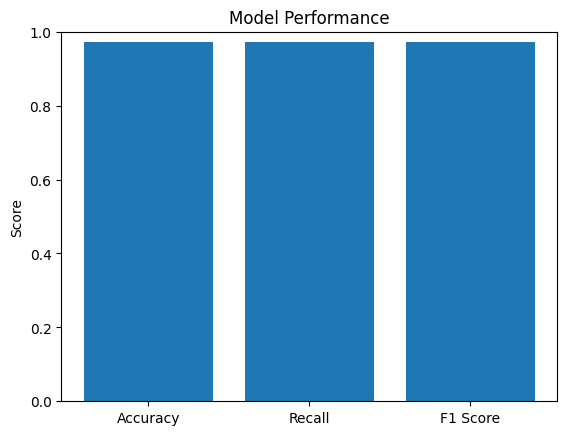

In [20]:
# Calculate accuracy, recall, and F1 score
accuracy = accuracy_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1:", f1)

# Create a bar plot
labels = ['Accuracy', 'Recall', 'F1 Score']
values = [accuracy, recall, f1]

plt.bar(labels, values)
plt.ylim(0, 1)  # Set the y-axis limit to match the range of accuracy, recall, and F1 score
plt.title('Model Performance')
plt.ylabel('Score')
plt.show()

1/1 [==============================] - 0s 18ms/step


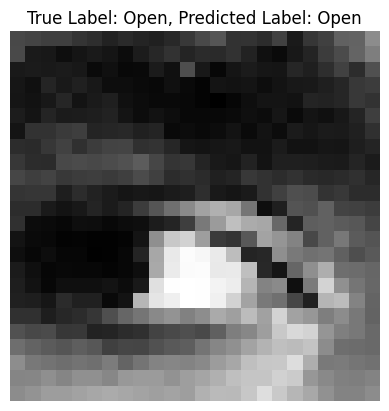

In [24]:

# Get a random test sample
sample_index = np.random.randint(len(test_batch.filenames))
sample_image = test_batch.filenames[sample_index]
sample_label = test_batch.classes[sample_index]

# Load and preprocess the image
img = image.load_img('data/valid/'+sample_image, target_size=TS, color_mode='grayscale')
img_array = image.img_to_array(img)
img_array /= 255.0
img_array = np.expand_dims(img_array, axis=0)

# Make predictions on the image
predictions = model.predict(img_array)
predicted_label = np.argmax(predictions)

# Get class labels
class_labels = list(test_batch.class_indices.keys())

# Print the image and predicted class label
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title(f"True Label: {class_labels[sample_label]}, Predicted Label: {class_labels[predicted_label]}")
plt.show()

In [29]:
# Get the total number of images in the test data
num_images = len(test_batch.filenames)

# Iterate over all the images
for i in range(num_images):
    # Get the image name and label at the current index
    image_name = test_batch.filenames[i]
    true_label = test_batch.classes[i]
    
    # Load and preprocess the image
    img = image.load_img('data/valid/' + image_name, target_size=TS, color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array /= 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    # Make predictions on the image
    predictions = model.predict(img_array)
    predicted_label = np.argmax(predictions)
    
    # Get class labels
    class_labels = list(test_batch.class_indices.keys())
    
    # Print image name and predicted class
    print("Image Name:", image_name+', True Label: '+ class_labels[true_label]+',Predicted Label:'+class_labels[predicted_label])
   
    print()

print("Predicted Class:", class_labels[predicted_label])

1/1 [==============================] - 0s 16ms/step
Image Name: Closed\_107.jpg, True Label: Closed,Predicted Label:Closed

1/1 [==============================] - 0s 16ms/step
Image Name: Closed\_115.jpg, True Label: Closed,Predicted Label:Closed

1/1 [==============================] - 0s 17ms/step
Image Name: Closed\_116.jpg, True Label: Closed,Predicted Label:Closed

1/1 [==============================] - 0s 15ms/step
Image Name: Closed\_120.jpg, True Label: Closed,Predicted Label:Closed

1/1 [==============================] - 0s 15ms/step
Image Name: Closed\_129.jpg, True Label: Closed,Predicted Label:Closed

1/1 [==============================] - 0s 15ms/step
Image Name: Closed\_130.jpg, True Label: Closed,Predicted Label:Closed

1/1 [==============================] - 0s 16ms/step
Image Name: Closed\_132.jpg, True Label: Closed,Predicted Label:Closed

1/1 [==============================] - 0s 16ms/step
Image Name: Closed\_137.jpg, True Label: Closed,Predicted Label:Closed

1/1 [===

1/1 [==============================] - 0s 14ms/step
Image Name: Closed\_495.jpg, True Label: Closed,Predicted Label:Closed

1/1 [==============================] - 0s 16ms/step
Image Name: Closed\_497.jpg, True Label: Closed,Predicted Label:Closed

1/1 [==============================] - 0s 13ms/step
Image Name: Closed\_498.jpg, True Label: Closed,Predicted Label:Closed

1/1 [==============================] - 0s 16ms/step
Image Name: Closed\_506.jpg, True Label: Closed,Predicted Label:Closed

1/1 [==============================] - 0s 14ms/step
Image Name: Closed\_514.jpg, True Label: Closed,Predicted Label:Closed

1/1 [==============================] - 0s 15ms/step
Image Name: Closed\_515.jpg, True Label: Closed,Predicted Label:Closed

1/1 [==============================] - 0s 16ms/step
Image Name: Closed\_529.jpg, True Label: Closed,Predicted Label:Closed

1/1 [==============================] - 0s 15ms/step
Image Name: Closed\_534.jpg, True Label: Closed,Predicted Label:Closed

1/1 [===

1/1 [==============================] - 0s 14ms/step
Image Name: Open\_214.jpg, True Label: Open,Predicted Label:Open

1/1 [==============================] - 0s 16ms/step
Image Name: Open\_216.jpg, True Label: Open,Predicted Label:Open

1/1 [==============================] - 0s 15ms/step
Image Name: Open\_219.jpg, True Label: Open,Predicted Label:Open

1/1 [==============================] - 0s 14ms/step
Image Name: Open\_221.jpg, True Label: Open,Predicted Label:Open

1/1 [==============================] - 0s 14ms/step
Image Name: Open\_226.jpg, True Label: Open,Predicted Label:Open

1/1 [==============================] - 0s 15ms/step
Image Name: Open\_231.jpg, True Label: Open,Predicted Label:Open

1/1 [==============================] - 0s 15ms/step
Image Name: Open\_240.jpg, True Label: Open,Predicted Label:Open

1/1 [==============================] - 0s 14ms/step
Image Name: Open\_242.jpg, True Label: Open,Predicted Label:Open

1/1 [==============================] - 0s 14ms/step
Imag

1/1 [==============================] - 0s 18ms/step
Image Name: Open\_650.jpg, True Label: Open,Predicted Label:Open

1/1 [==============================] - 0s 18ms/step
Image Name: Open\_656.jpg, True Label: Open,Predicted Label:Open

1/1 [==============================] - 0s 19ms/step
Image Name: Open\_666.jpg, True Label: Open,Predicted Label:Open

1/1 [==============================] - 0s 17ms/step
Image Name: Open\_667.jpg, True Label: Open,Predicted Label:Open

1/1 [==============================] - 0s 17ms/step
Image Name: Open\_679.jpg, True Label: Open,Predicted Label:Open

1/1 [==============================] - 0s 18ms/step
Image Name: Open\_687.jpg, True Label: Open,Predicted Label:Open

1/1 [==============================] - 0s 17ms/step
Image Name: Open\_7.jpg, True Label: Open,Predicted Label:Open

1/1 [==============================] - 0s 18ms/step
Image Name: Open\_710.jpg, True Label: Open,Predicted Label:Open

1/1 [==============================] - 0s 17ms/step
Image 

1/1 [==============================] - 0s 17ms/step
Image Name: no_yawn\211.jpg, True Label: no_yawn,Predicted Label:no_yawn

1/1 [==============================] - 0s 17ms/step
Image Name: no_yawn\2110.jpg, True Label: no_yawn,Predicted Label:no_yawn

1/1 [==============================] - 0s 18ms/step
Image Name: no_yawn\2197.jpg, True Label: no_yawn,Predicted Label:no_yawn

1/1 [==============================] - 0s 19ms/step
Image Name: no_yawn\2289.jpg, True Label: no_yawn,Predicted Label:no_yawn

1/1 [==============================] - 0s 17ms/step
Image Name: no_yawn\2311.jpg, True Label: no_yawn,Predicted Label:no_yawn

1/1 [==============================] - 0s 17ms/step
Image Name: no_yawn\233.jpg, True Label: no_yawn,Predicted Label:no_yawn

1/1 [==============================] - 0s 17ms/step
Image Name: no_yawn\2346.jpg, True Label: no_yawn,Predicted Label:no_yawn

1/1 [==============================] - 0s 17ms/step
Image Name: no_yawn\2351.jpg, True Label: no_yawn,Predicted L

1/1 [==============================] - 0s 17ms/step
Image Name: yawn\127.jpg, True Label: yawn,Predicted Label:yawn

1/1 [==============================] - 0s 17ms/step
Image Name: yawn\131.jpg, True Label: yawn,Predicted Label:yawn

1/1 [==============================] - 0s 17ms/step
Image Name: yawn\134.jpg, True Label: yawn,Predicted Label:yawn

1/1 [==============================] - 0s 17ms/step
Image Name: yawn\14.jpg, True Label: yawn,Predicted Label:yawn

1/1 [==============================] - 0s 16ms/step
Image Name: yawn\140.jpg, True Label: yawn,Predicted Label:yawn

1/1 [==============================] - 0s 18ms/step
Image Name: yawn\145.jpg, True Label: yawn,Predicted Label:yawn

1/1 [==============================] - 0s 17ms/step
Image Name: yawn\148.jpg, True Label: yawn,Predicted Label:yawn

1/1 [==============================] - 0s 16ms/step
Image Name: yawn\160.jpg, True Label: yawn,Predicted Label:yawn

1/1 [==============================] - 0s 18ms/step
Image Name: y

1/1 [==============================] - 0s 18ms/step
Image Name: yawn\564.jpg, True Label: yawn,Predicted Label:yawn

1/1 [==============================] - 0s 18ms/step
Image Name: yawn\602.jpg, True Label: yawn,Predicted Label:yawn

1/1 [==============================] - 0s 16ms/step
Image Name: yawn\606.jpg, True Label: yawn,Predicted Label:yawn

1/1 [==============================] - 0s 17ms/step
Image Name: yawn\61.jpg, True Label: yawn,Predicted Label:yawn

1/1 [==============================] - 0s 15ms/step
Image Name: yawn\619.jpg, True Label: yawn,Predicted Label:yawn

1/1 [==============================] - 0s 17ms/step
Image Name: yawn\622.jpg, True Label: yawn,Predicted Label:yawn

1/1 [==============================] - 0s 18ms/step
Image Name: yawn\63.jpg, True Label: yawn,Predicted Label:yawn

1/1 [==============================] - 0s 18ms/step
Image Name: yawn\630.jpg, True Label: yawn,Predicted Label:yawn

1/1 [==============================] - 0s 18ms/step
Image Name: ya

433/433 [==============================] - 1s 3ms/step
AUC for Class Closed : 0.9994620002265263
AUC for Class Open : 0.999433684448975
AUC for Class no_yawn : 0.9996602106693849
AUC for Class yawn : 0.9996826495874445


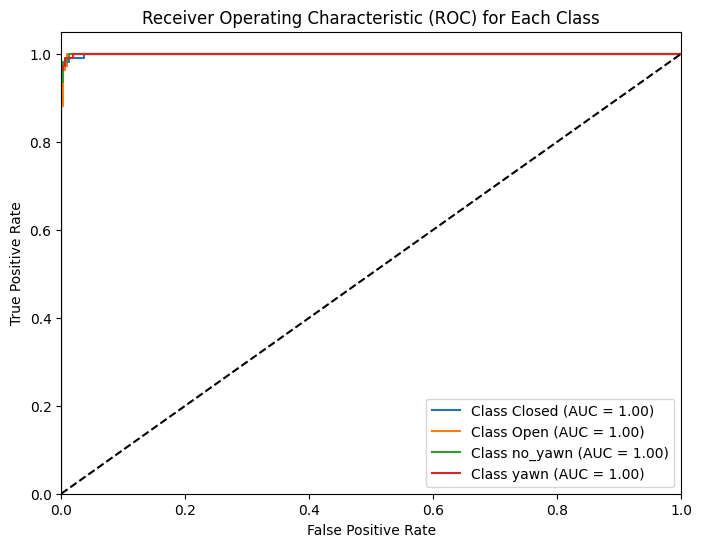

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Make predictions on the test data
y_pred = model.predict(test_batch)

# Calculate the AUC for each class
auc_scores = []
for i in range(len(class_labels)):
    true_labels = np.where(test_batch.classes == i, 1, 0)
    auc = roc_auc_score(true_labels, y_pred[:, i])
    auc_scores.append(auc)
    print("AUC for Class", class_labels[i], ":", auc)

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(len(class_labels)):
    true_labels = np.where(test_batch.classes == i, 1, 0)
    fpr, tpr, _ = roc_curve(true_labels, y_pred[:, i])
    plt.plot(fpr, tpr, label='Class {} (AUC = {:.2f})'.format(class_labels[i], auc_scores[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Each Class')
plt.legend(loc='lower right')
plt.show()



In [33]:
SPE = len(train_batch.classes) // BS
VS = len(valid_batch.classes) // BS

training_percentage = (SPE * BS) / len(train_batch.classes) * 100
validation_percentage = (VS * BS) / len(valid_batch.classes) * 100

In [34]:
print(training_percentage)
print(validation_percentage)

96.07390300230946
96.07390300230946
